# Transforming Data in Python

### Import packages and data

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
# For BoxCox 
from scipy import stats
from scipy.stats import boxcox

In [2]:
anime = pd.read_csv('C:/Users/chris/Desktop/data/DS105/Lesson1/anime.csv')

In [4]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


## Visualizing Data

<AxesSubplot: >

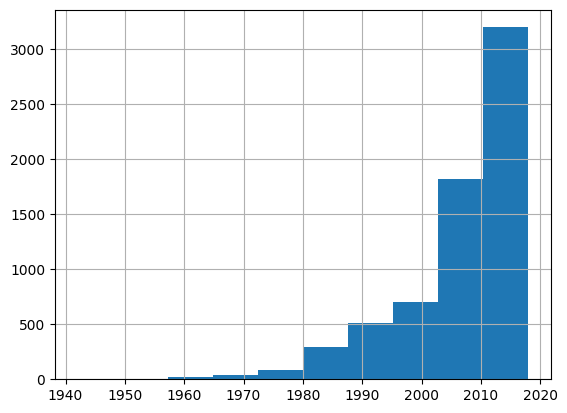

In [5]:
# Use .hist() from pandas to view the distribution of aired_from_year
anime.aired_from_year.hist()

C:\Users\chris\AppData\Local\Temp\ipykernel_24136\3971661429.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(anime['aired_from_year'])


<AxesSubplot: xlabel='aired_from_year', ylabel='Density'>

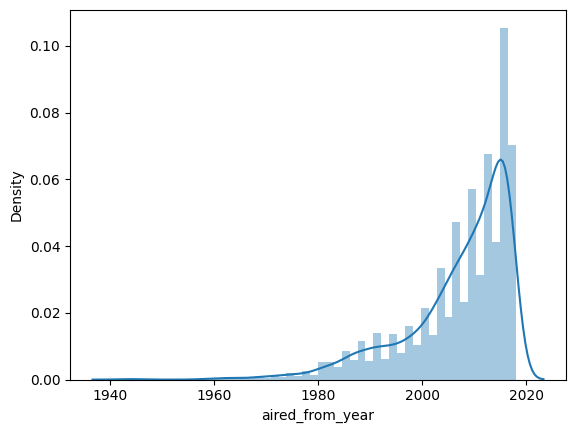

In [9]:
# Using Seaborn
sns.distplot(anime['aired_from_year'])

## Positive Skew Transformation

<AxesSubplot: >

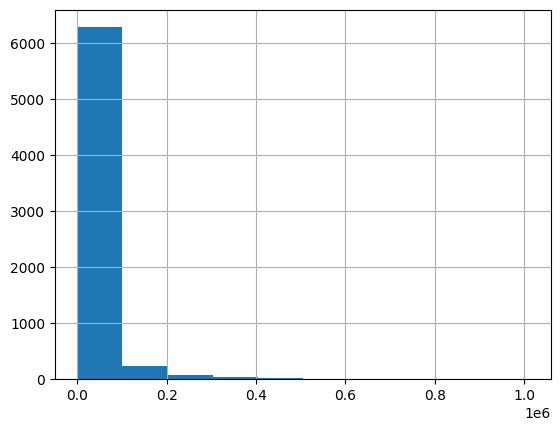

In [10]:
anime.scored_by.hist()

In [12]:
# Square Root Transformation using numpy np.sqrt()
anime['scored_bySQRT'] = np.sqrt(anime['scored_by'])


<AxesSubplot: >

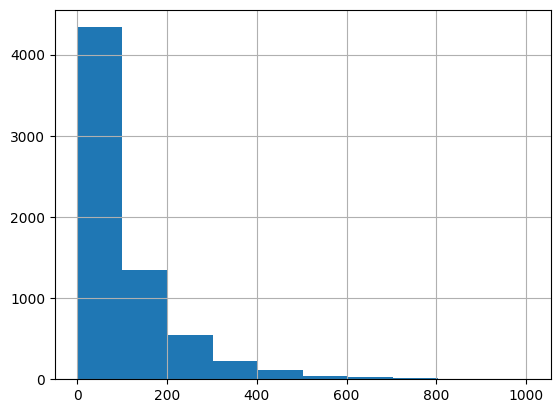

In [13]:
anime.scored_bySQRT.hist()

Still has a strong positive skew

In [14]:
# Log Tansformation using numpy np.log()
anime['scored_byLOG'] = np.log(anime['scored_by'])

C:\Python3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Warning indicated infinite values

In [16]:
# Dealing with infinite values
anime.dropna(inplace=True)

<AxesSubplot: >

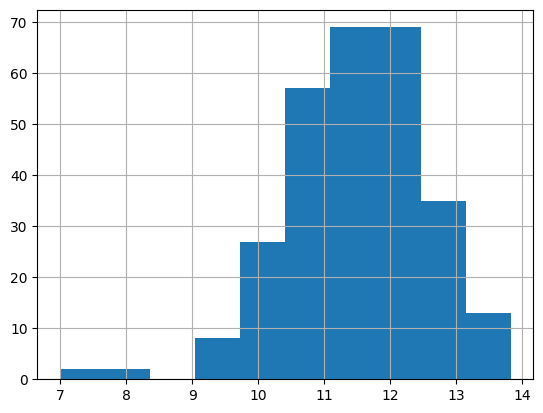

In [17]:
anime.scored_byLOG.hist()

# Transforming Negative Skew

<AxesSubplot: >

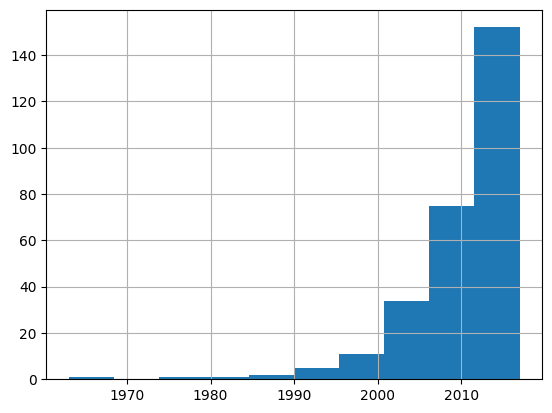

In [18]:
# Using aired_from_year
anime.aired_from_year.hist()

In [19]:
# Squre the variable
anime['aired_from_yearSQ'] = anime['aired_from_year']**2

<AxesSubplot: >

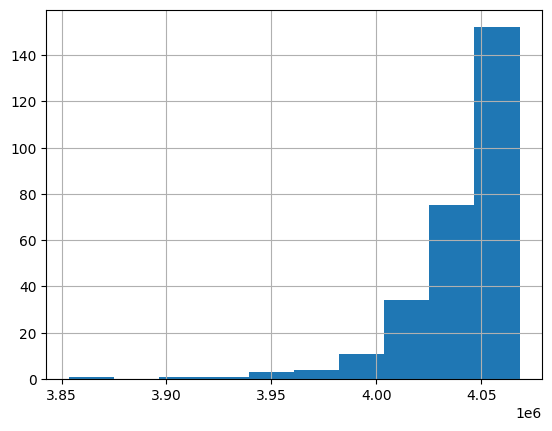

In [20]:
# View Histogram for aired_from_yearSQ
anime.aired_from_yearSQ.hist()

Still Mostly negative skew

In [21]:
# Cube the variable
anime['aired_from_yearCUBE'] = anime['aired_from_year']**3

<AxesSubplot: >

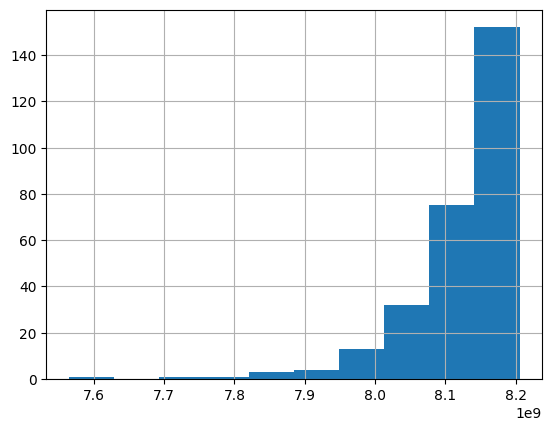

In [22]:
anime.aired_from_yearCUBE.hist()

Still Mostly Negative Skew

### BoxCox Transformation

In [23]:
# Similar to Tukey's Ladder of Power, however BoxCox must be used with caution 
# with Negative Skew
anime['scored_byLOG1'] = boxcox(anime['scored_by'],0)

<AxesSubplot: >

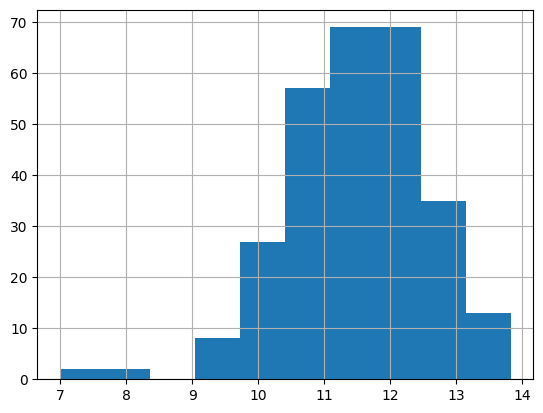

In [24]:
anime.scored_byLOG1.hist()

In [46]:
anime['scored_byLOG4'] = boxcox(anime['scored_by'],0.5)

<AxesSubplot: >

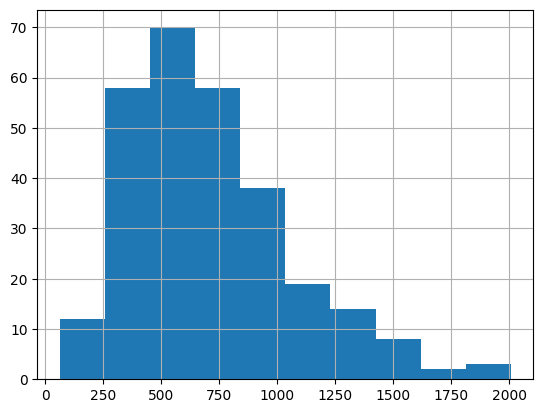

In [47]:
anime.scored_byLOG4.hist()